# Бинарные файлы

Как можно хранить произвольные данные на диске? Для этого у нас есть два варианта: текстовый и бинарный формат. 

Текстовый формат это человекочитаемый формат, где все записано как текст - строки, числа, другие типы. Такой формат удобно читать глазами, но работать с ним может быть крайне неэффективно: для того, чтобы его прочитать, надо перевести байтики в текст, а затем уже парсить текст в какие-то желаемые типы. Так, например, происходит в известном всеми формате csv. 

Бинарный формат предполагает, что в нем лежат байтики, но только читающий знает, как их правильно интепретировать. А значит, можно пропустить текстовый этап в парсинге и сразу переводить байты в то, что задано в структуре. Как правило, это получается сильно эффективнее.

In [3]:
!kaggle datasets download muthuj7/weather-dataset

 90%|██████████████████████████████████    | 2.00M/2.23M [00:00<00:00, 3.32MB/s]
100%|██████████████████████████████████████| 2.23M/2.23M [00:00<00:00, 3.18MB/s]


In [2]:
!unzip weatherHistory.csv.zip

Archive:  weatherHistory.csv.zip
  inflating: weatherHistory.csv      


Возьмем датасет погоды и выделим оттуда несколько интерсных для нас переменных. 

In [4]:
import pandas as pd
df = pd.read_csv('weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [5]:
sub_df = df[['Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)']]

In [6]:
sub_df.loc[:, 'Precip Type'][pd.isna(sub_df['Precip Type'])] = 'nan'

<ipython-input-6-a5e3903f44ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.loc[:, 'Precip Type'][pd.isna(sub_df['Precip Type'])] = 'nan'
/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [7]:
from sklearn.preprocessing import LabelEncoder


sub_df.loc[:, 'Summary'] = LabelEncoder().fit_transform(sub_df['Summary']).astype(int)
sub_df.loc[:, 'Precip Type'] = LabelEncoder().fit_transform(sub_df['Precip Type']).astype(int)
sub_df.to_csv("weather_small.csv", index=False)

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Теперь в weather_small.csv у нас будут храниться 2 int64 и 7 float32 переменных. 

In [8]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  int64  
 1   Precip Type               96453 non-null  int64  
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 7.4 MB


Оказывается, в numpy есть поддержка сложных типов. Давайте попробуем записать наш csv в numpy, а затем буквально положить этот numpy байтик за байтиком в файл.

In [9]:
import numpy as np

sub_df_numpy = np.ndarray(shape=sub_df.shape[0], dtype=np.dtype(f"<i8,<i8,<7f4"))
sub_df_numpy['f0'] = sub_df.iloc[:, 0].values
sub_df_numpy['f1'] = sub_df.iloc[:, 1].values
sub_df_numpy['f2'] = sub_df.iloc[:, 2:-1].values

In [10]:
sub_df_numpy.tofile('weather_small.bin')

А теперь сравним скорость считывания:

In [11]:
%%timeit
tmp_csv = pd.read_csv("weather_small.csv")

78.6 ms ± 859 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%%timeit
tmp_np = np.fromfile("weather_small.bin", dtype=np.dtype(f"<i8,<i8,<7f4"))

371 µs ± 5.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Видим, что прирост в скорости чтения получился почти в ~50 раз. Из минусов, нам пришлось знать заранее структуру файла и передать ее в чтение. 


Почему бы не воспользоваться np.save/np.load? Формально, это бинарный формат, который создан для произвольного парсинга numpy файлов:

In [13]:
np.save("weather_small.npy", sub_df_numpy)

In [14]:
%%timeit
np.load("weather_small.npy")

674 µs ± 9.69 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Получили некоторое замедление... Откуда - не совсем понятно.

Что если мы попробуем закодировать структуру файла руками в этот же файл? Затем при чтении, зная, что структура занимает N байт, и мы умеем ее интерпретировать, мы можем прочитать и сами данные.

In [16]:
import struct


# для упрощения будем работать с файлом из N флотов
sub_df_numpy = np.ndarray(shape=sub_df.shape[0], dtype=np.dtype(f"<7f4"))
sub_df_numpy = sub_df.iloc[:, 2:-1].values.astype(np.float32)

    
def binary_write_of_arbitrary_size(data, file):
    # кодируем в начале файла количество флотов, это будет наш заголовок
    with open(file, 'wb') as f:
        f.write(struct.pack("l", data.shape[1]))
    with open(file, 'a') as f:
        f.seek(8) # делаем сдвиг в файле, чтобы не перезаписать заголовок
        a = np.ndarray(shape=data.shape[0], dtype=np.dtype(f"<{data.shape[1]}f4"))
        a[:] = sub_df_numpy
        a.tofile(f)


def binary_read_of_arbitrary_size(file):
    with open(file, 'rb') as f:
        f_string = f.read()
        read_size = struct.unpack("l", f_string[:8]) # сначала читаем количество флотов
        data = np.frombuffer(f_string[8:], dtype=np.dtype(f"<{read_size}f4")) # а затем передаем его в парсинг
    return data

binary_write_of_arbitrary_size(sub_df_numpy, "weather_small.bin")  

assert (binary_read_of_arbitrary_size("weather_small.bin") == sub_df_numpy).all()

In [17]:
%%timeit 

tmp = binary_read_of_arbitrary_size("weather_small.bin")

415 µs ± 8.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
np.save("weather_small.npy", sub_df_numpy)

In [19]:
%%timeit 
np.load("weather_small.npy")

435 µs ± 4.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


А тут никакого преимущества мы уже не получили.

Далее мы поговорим о более продвинутых бинарных форматах для больших данных: Parquet и Arrow.

# Advanced Spark

Сегодня пройдемся по каким-то аспектам фреймворка Spark, которые не затрагивали в предыдущий раз, но которые могут оказаться очень полезными.

Датасет на сегодня - данные с сайта Airbnb

In [20]:
import pandas as pd
pd.set_option('display.max_columns', 500)

In [21]:
! hdfs dfs -mkdir -p /user/airbnb

Скачаем датасет из https://public.opendatasoft.com/explore/dataset/airbnb-listings/information

Можно также сказать с нашего зеркала - https://storage.yandexcloud.net/lsml-kosmos/mirror/airbnb-data.csv

In [22]:
! wget 'https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/airbnb-listings/exports/csv?lang=en&timezone=Europe%2FMoscow&use_labels=true&csv_separator=%3B' -O airbnb.csv

--2024-02-28 18:16:09--  https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/airbnb-listings/exports/csv?lang=en&timezone=Europe%2FMoscow&use_labels=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘airbnb.csv’

airbnb.csv              [              <=>   ]   1.75G  8.42MB/s    in 4m 13s  

2024-02-28 18:20:22 (7.08 MB/s) - ‘airbnb.csv’ saved [1876618331]



In [23]:
! file airbnb.csv

airbnb.csv: UTF-8 Unicode (with BOM) text, with very long lines, with CRLF, LF line terminators


In [24]:
! hdfs dfs -put airbnb.csv /user/airbnb/data.csv

In [25]:
! hdfs dfs -ls -h /user/airbnb

Found 1 items
-rw-r--r--   1 ubuntu hadoop      1.7 G 2024-02-28 18:20 /user/airbnb/data.csv


In [26]:
!pip install pyspark[sql]

     |████████████████████████████████| 317.0 MB 18 kB/s  eta 0:00:011     |████████████                    | 119.7 MB 76.9 MB/s eta 0:00:03
     |████████████████████████████████| 200 kB 59.8 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 46.0 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 49.0 MB/s eta 0:00:01
     |████████████████████████████████| 38.5 MB 240 kB/s  eta 0:00:01
     |████████████████████████████████| 247 kB 70.7 MB/s eta 0:00:01
     |████████████████████████████████| 505 kB 85.6 MB/s eta 0:00:01
     |████████████████████████████████| 345 kB 68.3 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488513 sha256=163c7665b223e86687f2b7399079100dc720895f5fb7e8e9b46872bf14bb6525
  Stored in directory: /home/ubuntu/.cache/pip/wheels/da/78/6d/54350e0243f65f77dccf6ebe2ed5559faf6900559e904fb957
Successfully built pyspark
  Consider adding this directory to PATH or, if you prefer to suppress t

In [27]:
import findspark
findspark.init()

In [28]:
import pyspark
sc = pyspark.SparkContext(appName="lsml-app-1")

In [29]:
from pyspark.sql import SparkSession, Row

In [30]:
se = SparkSession(sc)

In [48]:
data = se.read.option("mode", "DROPMALFORMED").option('sep', ';') \
.csv("/user/airbnb/data.csv", header=True, inferSchema=True)

In [49]:
data.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Listing Url: string (nullable = true)
 |-- Scrape ID: string (nullable = true)
 |-- Last Scraped: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Summary: string (nullable = true)
 |-- Space: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Experiences Offered: string (nullable = true)
 |-- Neighborhood Overview: string (nullable = true)
 |-- Notes: string (nullable = true)
 |-- Transit: string (nullable = true)
 |-- Access: string (nullable = true)
 |-- Interaction: string (nullable = true)
 |-- House Rules: string (nullable = true)
 |-- Thumbnail Url: string (nullable = true)
 |-- Medium Url: string (nullable = true)
 |-- Picture Url: string (nullable = true)
 |-- XL Picture Url: string (nullable = true)
 |-- Host ID: string (nullable = true)
 |-- Host URL: string (nullable = true)
 |-- Host Name: string (nullable = true)
 |-- Host Since: string (nullable = true)
 |-- Host Location: string (nullable

In [50]:
data.limit(4).toPandas()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,330798,https://www.airbnb.com/rooms/330798,20170508161515,2017-05-08,B&B Bio Organic Roma Stanza Malva,"""Il B&B si trova in una zona residenziale imme...",Our B&B is located in a residential area with ...,Our B&B is located in a residential area with ...,none,A few minutes walking you can find restaurant/...,For guests who choose to have breakfast (€5 pe...,A few minutes walking you can find the bus sto...,None,None,None,https://a0.muscache.com/im/pictures/6906461/a1...,https://a0.muscache.com/im/pictures/6906461/a1...,None,https://a0.muscache.com/im/pictures/6906461/a1...,1650524,https://www.airbnb.com/users/show/1650524,Barbara,2012-01-25,"Rome, Lazio, Italy",Sono Barbara e gestisco il B&B Bio a Roma. Ado...,within an hour,100,None,https://a0.muscache.com/im/users/1650524/profi...,https://a0.muscache.com/im/users/1650524/profi...,None,4,4,"email,phone,facebook,reviews","Rome, Lazio 00135, Italy",None,XIV Monte Mario,None,Rome,Lazio,00135,Rome,"Rome, Italy",IT,Italy,41.94317562539487,12.438111860883202,Bed & Breakfast,Private room,3,1.0,1,2,Real Bed,"TV,Wireless Internet,Breakfast,Elevator in bui...",None,65,520,1500,None,None,1,15,1,90,5 weeks ago,None,29,58,88,363,2017-05-08,2,2012-06-12,2015-09-19,90,10,9,9,10,8,9,None,None,flexible_new,3,0.03,"41.94317562539487, 12.438111860883202",Host Has Profile Pic
1,7231930,https://www.airbnb.com/rooms/7231930,20170407015847,2017-04-07,Cornur Room @ 1234 HOUSE in SE PDX,One of five artist-made guest rooms in a recen...,Cornur Room's key feature is it's high-end pri...,One of five artist-made guest rooms in a recen...,none,1234 House is in the Buckman neighborhood of S...,There is no off-street parking here. We live o...,This neighborhood is very walkable. We also ha...,"In addition to the room's private bathroom, a ...","I live here. I'm Evan, 34, a native Portlander...",General respect and kindness is a good place t...,https://a0.muscache.com/im/pictures/acdba4bd-b...,https://a0.muscache.com/im/pictures/acdba4bd-b...,None,https://a0.muscache.com/im/pictures/acdba4bd-b...,30708290,https://www.airbnb.com/users/show/30708290,Evan,2015-04-06,"Portland, Oregon, United States",My name is Evan. I'm a native Portlander who h...,within an hour,100,None,https://a0.muscache.com/im/users/30708290/prof...,https://a0.muscache.com/im/users/30708290/prof...,Buckman,5,5,"email,phone,reviews,kba","Buckman, Portland, OR 97214, United States",Buckman,Buckman,None,Portland,OR,97214,Portland,"Portland, OR",US,United States,45.5142536154734,-122.64597209314657,House,Private room,2,3.0,1,1,Real Bed,"Wireless Internet,Air conditioning,Kitchen,Ind...",None,77,None,None,100,15,2,0,1,1125,a week ago,None,17,44,74,74,2017-04-07,76,2015-07-11,2017-03-19,98,10,10,10,10,10

## Advanced Binary Formats


Как обещали, сейчас мы поговорим про более продвинутые бинарные форматы. Начнем с Parquet

### Parquet


Что же такое паркет? Это бинарный формат, основная цель которого это оптимизация I/O - то есть хранения данных, чтения, быстрой передачи через сеть. Есть несколько основных ингредиентов, за счет которых он работает:


1. Hybrid Storage Format

Часто говорят, что Parquet это колоночный формат. На самом деле это не совсем так:

<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*QEQJjtnDb3JQ2xqhzARZZw.png" alt="Alternative text" />


Это позволяет соблюдать trade-off между более row-intensive и column-intensive командами. 

Данные батчи данных в гибридном формате называются Row Groups.

2. Хранение метаинформации

Допустим, мы хотим посчитать какой-то предикат вида "колонка i < 5". Тогда, сохраняя метаинформацию для каждой Row Group, например, максимум и минимум, мы можем быстро пропускать лишние блоки данных:

<img src="https://miro.medium.com/v2/resize:fit:700/format:webp/1*EzPLuhgFw2hbsQHTP7lEvA.png" alt="Alternative text" />

3. Dictionary encoding

Если мы храним строки, которые встречаются неуникально много раз, то можно закодировать их:

<img src="https://malinxiao.files.wordpress.com/2021/12/image-47.png?w=396" alt="Alternative text" />


4. И многое другое...
Классное видео для более подробного знакомства: https://www.youtube.com/watch?v=1j8SdS7s_NY

In [51]:
%%time

data.count()

CPU times: user 1.47 ms, sys: 430 µs, total: 1.9 ms
Wall time: 2.8 s


914210

Посчитаем например среднее квадрата значения в колонке price

In [52]:
%%time

data.rdd.map(lambda x: float(x.Price or 0.0) ** 2).mean()

CPU times: user 7.71 ms, sys: 2.03 ms, total: 9.74 ms
Wall time: 14.5 s


42017.68492409321

~32 секунды. Пробуем сконвертировать в паркет.

In [53]:
! hdfs dfs -rm -r /user/airbnb/parquet
! hdfs dfs -mkdir -p /user/airbnb/parquet

Deleted /user/airbnb/parquet


In [54]:
for column in data.columns:
    data = data.withColumnRenamed(column, column.lower().replace(' ', '_'))

In [55]:
data.write.parquet("/user/airbnb/parquet/data.parquet")

In [56]:
!hdfs dfs -du -h /user/airbnb/parquet/data.parquet  | wc -l

15


In [57]:
!hdfs dfs -du -h /user/airbnb/parquet/data.parquet 

0       0       /user/airbnb/parquet/data.parquet/_SUCCESS
40.3 M  40.3 M  /user/airbnb/parquet/data.parquet/part-00000-95520cd3-e97d-49be-ae35-225a739ff18f-c000.snappy.parquet
40.9 M  40.9 M  /user/airbnb/parquet/data.parquet/part-00001-95520cd3-e97d-49be-ae35-225a739ff18f-c000.snappy.parquet
41.3 M  41.3 M  /user/airbnb/parquet/data.parquet/part-00002-95520cd3-e97d-49be-ae35-225a739ff18f-c000.snappy.parquet
40.8 M  40.8 M  /user/airbnb/parquet/data.parquet/part-00003-95520cd3-e97d-49be-ae35-225a739ff18f-c000.snappy.parquet
41.0 M  41.0 M  /user/airbnb/parquet/data.parquet/part-00004-95520cd3-e97d-49be-ae35-225a739ff18f-c000.snappy.parquet
40.8 M  40.8 M  /user/airbnb/parquet/data.parquet/part-00005-95520cd3-e97d-49be-ae35-225a739ff18f-c000.snappy.parquet
40.8 M  40.8 M  /user/airbnb/parquet/data.parquet/part-00006-95520cd3-e97d-49be-ae35-225a739ff18f-c000.snappy.parquet
40.9 M  40.9 M  /user/airbnb/parquet/data.parquet/part-00007-95520cd3-e97d-49be-ae35-225a739ff18f-c000.snappy.parqu

In [58]:
!hdfs dfs -du -s -h /user/airbnb/parquet/data.parquet 

571.2 M  571.2 M  /user/airbnb/parquet/data.parquet


In [59]:
!hdfs dfs -du -h /user/airbnb/data.csv

1.7 G  1.7 G  /user/airbnb/data.csv


Визуально наблюдаем оптимизацию по объему хранения **одного и того же числа данных**

In [60]:
data_parquet = se.read.parquet("/user/airbnb/parquet/data.parquet")

In [61]:
data_parquet.printSchema()

root
 |-- id: string (nullable = true)
 |-- listing_url: string (nullable = true)
 |-- scrape_id: string (nullable = true)
 |-- last_scraped: string (nullable = true)
 |-- name: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- space: string (nullable = true)
 |-- description: string (nullable = true)
 |-- experiences_offered: string (nullable = true)
 |-- neighborhood_overview: string (nullable = true)
 |-- notes: string (nullable = true)
 |-- transit: string (nullable = true)
 |-- access: string (nullable = true)
 |-- interaction: string (nullable = true)
 |-- house_rules: string (nullable = true)
 |-- thumbnail_url: string (nullable = true)
 |-- medium_url: string (nullable = true)
 |-- picture_url: string (nullable = true)
 |-- xl_picture_url: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_url: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- host_since: string (nullable = true)
 |-- host_location: string (nullable

Попробуем повторить запрос выше.

In [62]:
%%time

data_parquet.rdd.map(lambda x: float(x.price or 0) ** 2).mean()

CPU times: user 10.5 ms, sys: 0 ns, total: 10.5 ms
Wall time: 8.35 s


42017.68492409322

~26 секунд! Не фантастика, но 10 секунд сэкономили. И тут нам поможет следующий формат:

## Arrow

Arrow это **in-memory** формат хранения данных. То есть он не особо оптимизирован под хранение как Parquet (хотя он тоже бинарный). Но сила его в вычислениях и универсальном формате хранения. Какие же там фишки?

**Cache locality, pipelining, and SIMD instructions**

Если с первыми двумя мы знакомы, то что такое SIMD?

<img src="https://lh3.googleusercontent.com/proxy/TAv_dMn00xlWRJ3lrVkh9DQ8wQzbGpKzRJE-LiiPV8NDa2F4COQVoUB051cLxSMERPybntoKJjpltBsGCp3YeT75k7pUDT4qNmq_86TdRVDWsuf8kxQrmJT31roPcW3PyWkNTesvSo2_fZkuox0Mntret5iltjmO1LSVaZXJvGwDqITo3XhV7XgRZ5UNXXKTwKPfYG8" alt="Alternative text" />


In [63]:
data = data_parquet

In [64]:
data.registerTempTable("airbnb")

#### Посмотрим еще раз на таблицу

In [65]:
data.limit(4).toPandas()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,cancellation_policy,calculated_host_listings_count,reviews_per_month,geolocation,features
0,13714521,https://www.airbnb.com/rooms/13714521,20160709001120,2016-07-09,Room in bright cheery Edinburgh flat,My place is close to Edinburgh University and ...,This is a beautiful Victorian Edinburgh teneme...,My place is close to Edinburgh University and ...,none,I'm just a 5 minute walk from most of the Univ...,None,There is great public transport to most parts ...,The bedroom is all yours :-) I am happy for y...,I'll most likely be around in the evenings and...,"- The kitchen is just for me to cook in, sorry...",https://a2.muscache.com/im/pictures/7af063e4-3...,https://a2.muscache.com/im/pictures/7af063e4-3...,None,https://a2.muscache.com/im/pictures/7af063e4-3...,1833993,https://www.airbnb.com/users/show/1833993,Rebecca,2012-02-29,GB,None,within a day,100,50%,https://a2.muscache.com/im/pictures/4a6b0525-e...,https://a2.muscache.com/im/pictures/4a6b0525-e...,Tollcross,2,2,"email,phone","Panmure Place, Edinburgh, EH3, United Kingdom",Tollcross,Tollcross,None,Edinburgh,None,EH3,None,"Edinburgh, United Kingdom",GB,United Kingdom,55.943816949802084,-3.201467794766344,Apartment,Private room,2,1.5,1,1,Real Bed,"Wireless Internet,Breakfast,Heating,Smoke Dete...",None,60,None,None,150,None,1,0,1,5,a week ago,None,0,0,25,65,2016-07-09,0,None,None,None,None,None,None,None,None,None,None,None,flexible,1,None,"55.943816949802084, -3.201467794766344","Host Has Profile Pic,Is Location Exact"
1,12168521,https://www.airbnb.com/rooms/12168521,20160709001120,2016-07-09,Central 2 Bed Flat - FREE Parking,Bright and spacious 2 bedroom apartment with p...,The living room over looks a lovely bowling gr...,Bright and spacious 2 bedroom apartment with p...,none,Ardmillan lies to the west of the city centre....,None,There is a bus stop on the corner of the stree...,"I will personally be there to meet guests, han...",I live close by if you need any assistance wit...,This is a residential apartment block so we wo...,https://a2.muscache.com/im/pictures/13d73da4-a...,https://a2.muscache.com/im/pictures/13d73da4-a...,None,https://a2.muscache.com/im/pictures/13d73da4-a...,65365028,https://www.airbnb.com/users/show/65365028,Murray,2016-04-01,GB,None,within an hour,100,100%,https://a2.muscache.com/im/pictures/280562e5-0...,https://a2.muscache.com/im/pictures/280562e5-0...,None,1,1,"email,phone,google,reviews,jumio","Ardmillan Place, Edinburgh, EH11 2JU EH11 2JU,...",None,Polwarth,None,Edinburgh,EH11 2JU,EH11 2JU,Edinburgh,"Edinburgh, United Kingdom",GB,United Kingdom,55.938473314183724,-3.224693146014332,Apartment,Entire home/apt,4,1.0,2,3,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Free Par...",None,100,None,None,200,None,1,0,3,1125,yesterday,None,30,60,72,74,2016-07-09,3,2016-06-19,2016-07-04,100,10,10,10,10,10

В SQL есть готовые функции для манипуляции с данными. Весь список можно найти здесь - https://spark.apache.org/docs/2.3.0/api/sql/index.html . Конкретно сейчас воспользуемся split, которая превращает строку в массив строк, разбивая ее по указанному символу.

In [66]:

se.sql("""
SELECT cast(host_response_rate as int) * 2 as f_host_response_rate
FROM airbnb
LIMIT 10
""").toPandas()

,f_host_response_rate
0,200.0
1,200.0
2,200.0
3,200.0
4,200.0
5,200.0
6,200.0
7,200.0
8,200.0
9,NaN


`explode` распупочивает список в отдельные записи в таблице

In [67]:
se.sql("""
    SELECT id, explode(split(amenities, ',')) as amenities
    FROM airbnb
    LIMIT 10
""").toPandas()

,id,amenities
0,13714521,Wireless Internet
1,13714521,Breakfast
2,13714521,Heating
3,13714521,Smoke Detector
4,13714521,Essentials
5,13714521,Shampoo
6,13714521,Hangers
7,13714521,Hair Dryer
8,13714521,Iron
9,13714521,translation missing: en.hosting_amenity_49


Чтож, давайте немного позанимается машинным обучением. Задача будет простая и понятная - предсказываем цену для квартиры.

Давайте придумывать признаки

In [68]:
se.sql("""
SELECT (cast(now() as long) - cast(cast(host_since as timestamp) as long)) / (60 * 60 * 24) as f_host_for
FROM airbnb
LIMIT 10
""").toPandas()

,f_host_for
0,4382.790613
1,2889.790613
2,3170.790613
3,3080.790613
4,3012.790613
5,2751.790613
6,3450.790613
7,3499.790613
8,3187.790613
9,3993.790613


In [69]:
se.sql("""
SELECT cast(host_response_rate as int) as f_host_response_rate, cast(host_acceptance_rate as int) as f_host_acceptance_rate, cast(host_total_listings_count as int) as f_host_total_listings_count
FROM airbnb
LIMIT 10
""").toPandas()

,f_host_response_rate,f_host_acceptance_rate,f_host_total_listings_count
0,100.0,NaN,2
1,100.0,NaN,1
2,100.0,NaN,1
3,100.0,NaN,6
4,100.0,NaN,3
5,100.0,NaN,3
6,100.0,NaN,7
7,100.0,NaN,1
8,100.0,NaN,2
9,NaN,NaN,1


In [70]:
se.sql("""
SELECT size(split(host_verifications, ',')) as f_num_of_ver
FROM airbnb
LIMIT 10
""").toPandas()

,f_num_of_ver
0,2
1,5
2,4
3,4
4,4
5,6
6,3
7,3
8,3
9,7


#### Used defined functions

Все числа было бы неплохо привести к нормальному виду. 
Делать это чисто из SQL достаточно непросто, поэтому можно попробовать заиспользовать питоновский код прямо в SQL

In [71]:
def to_number(raw_value):
    try:
        return float(raw_value)
    except:
        return 0.0

In [73]:
se.udf.register("to_number", to_number, "float")

<function __main__.to_number(raw_value)>

Соберем в одну табличку с признаками

In [74]:
se.sql("""
SELECT id, 
       (cast(now() as long) - cast(cast(host_since as timestamp) as long)) / (60 * 60 * 24) as f_host_for,
       to_number(cast(host_response_rate as int)) as f_host_response_rate, 
       to_number(cast(host_acceptance_rate as int)) as f_host_acceptance_rate, 
       to_number(cast(host_total_listings_count as int)) as f_host_total_listings_count,
       to_number(size(split(host_verifications, ','))) as f_num_of_ver,
       to_number(cast(host_listings_count as int)) as f_host_listings_count
FROM airbnb
""").registerTempTable("hosts_features")

In [75]:
%%timeit
se.sql("""
SELECT *
FROM hosts_features
LIMIT 5
""").toPandas()

240 ms ± 33.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [76]:
review_columns = [
    c
    for c in data.columns
    if c.startswith('review')
] + ["number_of_reviews"]

In [77]:
review_columns

['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month',
 'number_of_reviews']

Пошаманим с запросом через вставку в SQL

In [78]:
query = ", ".join([
    "to_number({c}) as f_{c}".format(c=c)
    for c in review_columns
])

In [79]:
query

'to_number(review_scores_rating) as f_review_scores_rating, to_number(review_scores_accuracy) as f_review_scores_accuracy, to_number(review_scores_cleanliness) as f_review_scores_cleanliness, to_number(review_scores_checkin) as f_review_scores_checkin, to_number(review_scores_communication) as f_review_scores_communication, to_number(review_scores_location) as f_review_scores_location, to_number(review_scores_value) as f_review_scores_value, to_number(reviews_per_month) as f_reviews_per_month, to_number(number_of_reviews) as f_number_of_reviews'

In [80]:
se.sql("""
SELECT id, {}
FROM airbnb
""".format(query)).registerTempTable("reviews_features")

In [81]:
se.sql("""
SELECT *
FROM reviews_features
LIMIT 5
""").toPandas()

,id,f_review_scores_rating,f_review_scores_accuracy,f_review_scores_cleanliness,f_review_scores_checkin,f_review_scores_communication,f_review_scores_location,f_review_scores_value,f_reviews_per_month,f_number_of_reviews
0,13714521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,12168521,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3.00,3.0
2,7007793,94.0,10.0,10.0,10.0,10.0,9.0,10.0,4.04,49.0
3,8537894,94.0,9.0,9.0,10.0,10.0,10.0,10.0,6.28,120.0
4,13082743,95.0,10.0,9.0,10.0,10.0,10.0,10.0,6.86,81.0


In [82]:
data.limit(4).toPandas()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,cancellation_policy,calculated_host_listings_count,reviews_per_month,geolocation,features
0,13714521,https://www.airbnb.com/rooms/13714521,20160709001120,2016-07-09,Room in bright cheery Edinburgh flat,My place is close to Edinburgh University and ...,This is a beautiful Victorian Edinburgh teneme...,My place is close to Edinburgh University and ...,none,I'm just a 5 minute walk from most of the Univ...,None,There is great public transport to most parts ...,The bedroom is all yours :-) I am happy for y...,I'll most likely be around in the evenings and...,"- The kitchen is just for me to cook in, sorry...",https://a2.muscache.com/im/pictures/7af063e4-3...,https://a2.muscache.com/im/pictures/7af063e4-3...,None,https://a2.muscache.com/im/pictures/7af063e4-3...,1833993,https://www.airbnb.com/users/show/1833993,Rebecca,2012-02-29,GB,None,within a day,100,50%,https://a2.muscache.com/im/pictures/4a6b0525-e...,https://a2.muscache.com/im/pictures/4a6b0525-e...,Tollcross,2,2,"email,phone","Panmure Place, Edinburgh, EH3, United Kingdom",Tollcross,Tollcross,None,Edinburgh,None,EH3,None,"Edinburgh, United Kingdom",GB,United Kingdom,55.943816949802084,-3.201467794766344,Apartment,Private room,2,1.5,1,1,Real Bed,"Wireless Internet,Breakfast,Heating,Smoke Dete...",None,60,None,None,150,None,1,0,1,5,a week ago,None,0,0,25,65,2016-07-09,0,None,None,None,None,None,None,None,None,None,None,None,flexible,1,None,"55.943816949802084, -3.201467794766344","Host Has Profile Pic,Is Location Exact"
1,12168521,https://www.airbnb.com/rooms/12168521,20160709001120,2016-07-09,Central 2 Bed Flat - FREE Parking,Bright and spacious 2 bedroom apartment with p...,The living room over looks a lovely bowling gr...,Bright and spacious 2 bedroom apartment with p...,none,Ardmillan lies to the west of the city centre....,None,There is a bus stop on the corner of the stree...,"I will personally be there to meet guests, han...",I live close by if you need any assistance wit...,This is a residential apartment block so we wo...,https://a2.muscache.com/im/pictures/13d73da4-a...,https://a2.muscache.com/im/pictures/13d73da4-a...,None,https://a2.muscache.com/im/pictures/13d73da4-a...,65365028,https://www.airbnb.com/users/show/65365028,Murray,2016-04-01,GB,None,within an hour,100,100%,https://a2.muscache.com/im/pictures/280562e5-0...,https://a2.muscache.com/im/pictures/280562e5-0...,None,1,1,"email,phone,google,reviews,jumio","Ardmillan Place, Edinburgh, EH11 2JU EH11 2JU,...",None,Polwarth,None,Edinburgh,EH11 2JU,EH11 2JU,Edinburgh,"Edinburgh, United Kingdom",GB,United Kingdom,55.938473314183724,-3.224693146014332,Apartment,Entire home/apt,4,1.0,2,3,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Free Par...",None,100,None,None,200,None,1,0,3,1125,yesterday,None,30,60,72,74,2016-07-09,3,2016-06-19,2016-07-04,100,10,10,10,10,10

Есть еще целая пачка хороший признаков в том числе и категориальных про саму квартиру. Закодируем их.

In [83]:
se.sql("""
SELECT distinct(property_type)
FROM airbnb
""").toPandas()

,property_type
0,Heritage hotel (India)
1,Apartment
2,Townhouse
3,Bed & Breakfast
4,Earth House
5,Pension (Korea)
6,Guest suite
7,Timeshare
8,Hut
9,None


In [84]:
se.sql("""
SELECT distinct(room_type)
FROM airbnb
""").toPandas()

,room_type
0,Shared room
1,None
2,Entire home/apt
3,9
4,Private room


In [85]:
se.sql("""
SELECT distinct(bed_type)
FROM airbnb
""").toPandas()

,bed_type
0,None
1,Airbed
2,Futon
3,Pull-out Sofa
4,Couch
5,9
6,Real Bed


In [86]:
se.sql("""
    SELECT distinct(explode(split(amenities, ',')))
    FROM airbnb
""").toPandas()

,col
0,Lock on Bedroom Door
1,Wheelchair accessible
2,Indoor fireplace
3,Private bathroom
4,Private living room
...,...
130,Baby bath
131,Elevator in building
132,Free parking on premises
133,24-hour check-in


#### Программно создаваемые запросы через DataFrame API

Чтобы более гибко контролировать запросы, можно использовать не тестовый способ запуска SQL, а программный через DataFrame API.

Подробнее про то, как составлять такие запросы и какие готовые фукнции уже существуют - на официальном сайте https://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html

In [87]:
from pyspark.sql import functions as F

In [88]:
data.printSchema()

root
 |-- id: string (nullable = true)
 |-- listing_url: string (nullable = true)
 |-- scrape_id: string (nullable = true)
 |-- last_scraped: string (nullable = true)
 |-- name: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- space: string (nullable = true)
 |-- description: string (nullable = true)
 |-- experiences_offered: string (nullable = true)
 |-- neighborhood_overview: string (nullable = true)
 |-- notes: string (nullable = true)
 |-- transit: string (nullable = true)
 |-- access: string (nullable = true)
 |-- interaction: string (nullable = true)
 |-- house_rules: string (nullable = true)
 |-- thumbnail_url: string (nullable = true)
 |-- medium_url: string (nullable = true)
 |-- picture_url: string (nullable = true)
 |-- xl_picture_url: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_url: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- host_since: string (nullable = true)
 |-- host_location: string (nullable

In [89]:
data.select(['id', 'name', 'price']).limit(10).toPandas()

,id,name,price
0,13714521,Room in bright cheery Edinburgh flat,60
1,12168521,Central 2 Bed Flat - FREE Parking,100
2,7007793,Countryside in the middle of town,48
3,8537894,Apartment for Rent,150
4,13082743,Cozy Private Bedroom in Wicker Park Chicago!!,85
5,16439846,2BR Modern Condo UIC/RUSH/Little Italy/Blue Li...,100
6,4380238,Wonderful 630m² loft in Brussels,200
7,3753548,Loft in city center!,70
8,18056395,"Cozy, peaceful flat near the centre",596
9,14728284,Lovely and spacious apartment,397


In [90]:
data.select(['id', 'name', 'price']).where(F.col('id') == '14916824').limit(10).toPandas()

,id,name,price
0,14916824,Chambre privée centre-ville/Private room downtown,25


In [91]:
amenities_c = se.sql("""
    SELECT distinct(explode(split(lower(amenities), ',')))
    FROM airbnb
""").rdd.map(lambda x: x.col).collect()

In [92]:
amenities_c

['refrigerator',
 'step-free access',
 'stove',
 'wide hallway clearance',
 'path to entrance lit at night',
 'ev charger',
 'wide doorway',
 'grab-rails for shower and toilet',
 'cooking basics',
 'pets allowed',
 'heating',
 'lake access',
 'patio or balcony',
 'washer / dryer',
 'wide clearance to shower and toilet',
 'doorman',
 'private living room',
 'game console',
 'long term stays allowed',
 'buzzer/wireless intercom',
 'coffee maker',
 'pocket wifi',
 'oven',
 'tub with shower bench',
 'host greets you',
 'tv',
 'pets live on this property',
 'garden or backyard',
 'crib',
 'carbon monoxide detector',
 'laptop friendly workspace',
 'hair dryer',
 'dishes and silverware',
 'wireless internet',
 'hangers',
 'pool',
 'kitchen',
 'safety card',
 'extra pillows and blankets',
 'fire extinguisher',
 'table corner guards',
 'family/kid friendly',
 'wide clearance to bed',
 'paid parking off premises',
 'translation missing: en.hosting_amenity_50',
 'indoor fireplace',
 'washer',
 'l

`F.when` проверяет условие и если оно верно то выставляет указанное значение, если не верно, то значение указанное в `otherwise`. 

In [93]:
import string

allowed = set(string.ascii_letters + string.digits + " ,")

def slugify(text):
    if not text:
        return ""
    text = "".join([ch for ch in text.lower() if ch in allowed])
    return text.replace(' ', '_')

In [94]:
f_slugify = se.udf.register("slugify", slugify, "string")

In [95]:
exprs = [
    F.when(
        F.array_contains(F.split(f_slugify('amenities'), ','), slugify(amenity)),
        1
    )
    .otherwise(0).alias("f_cat_amenity_" + slugify(amenity)) 
    for amenity in amenities_c
]

In [96]:
data.select('id', *exprs).limit(5).toPandas()

,id,f_cat_amenity_refrigerator,f_cat_amenity_stepfree_access,f_cat_amenity_stove,f_cat_amenity_wide_hallway_clearance,f_cat_amenity_path_to_entrance_lit_at_night,f_cat_amenity_ev_charger,f_cat_amenity_wide_doorway,f_cat_amenity_grabrails_for_shower_and_toilet,f_cat_amenity_cooking_basics,f_cat_amenity_pets_allowed,f_cat_amenity_heating,f_cat_amenity_lake_access,f_cat_amenity_patio_or_balcony,f_cat_amenity_washer__dryer,f_cat_amenity_wide_clearance_to_shower_and_toilet,f_cat_amenity_doorman,f_cat_amenity_private_living_room,f_cat_amenity_game_console,f_cat_amenity_long_term_stays_allowed,f_cat_amenity_buzzerwireless_intercom,f_cat_amenity_coffee_maker,f_cat_amenity_pocket_wifi,f_cat_amenity_oven,f_cat_amenity_tub_with_shower_bench,f_cat_amenity_host_greets_you,f_cat_amenity_tv,f_cat_amenity_pets_live_on_this_property,f_cat_amenity_garden_or_backyard,f_cat_amenity_crib,f_cat_amenity_carbon_monoxide_detector,f_cat_amenity_laptop_friendly_workspace,f_cat_amenity_hair_dryer,f_cat_amenity_dishes_and_silverware,f_cat_amenity_wireless_internet,f_cat_amenity_hangers,f_cat_amenity_pool,f_cat_amenity_kitchen,f_cat_amenity_safety_card,f_cat_amenity_extra_pillows_and_blankets,f_cat_amenity_fire_extinguisher,f_cat_amenity_table_corner_guards,f_cat_amenity_familykid_friendly,f_cat_amenity_wide_clearance_to_bed,f_cat_amenity_paid_parking_off_premises,f_cat_amenity_translation_missing_enhostingamenity50,f_cat_amenity_indoor_fireplace,f_cat_amenity_washer,f_cat_amenity_lockbox,f_cat_amenity_gym,f_cat_amenity_cable_tv,f_cat_amenity_keypad,f_cat_amenity_waterfront,f_cat_amenity_bed_linens,f_cat_amenity_accessibleheight_toilet,f_cat_amenity_hot_tub,f_cat_amenity_dogs,f_cat_amenity_elevator_in_building,f_cat_amenity_wheelchair_accessible,f_cat_amenity_other_pets,f_cat_amenity_cats,f_cat_amenity_iron,f_cat_amenity_fireplace_guards,f_cat_amenity_changing_table,f_cat_amenity_suitable_for_events,f_cat_amenity_first_aid_kit,f_cat_amenity_ethernet_connection,f_cat_amenity_self_checkin,f_cat_amenity_flat_smooth_pathway_to_front_door,f_cat_amenity_internet,f_cat_amenity_window_guards,f_cat_amenity_lock_on_bedroom_door,f_cat_amenity_breakfast,f_cat_amenity_childrens_books_and_toys,f_cat_amenity_childrens_dinnerware,f_cat_amenity_firm_matress,f_cat_amenity_baby_bath,f_cat_amenity_doorman_entry,f_cat_amenity_microwave,f_cat_amenity_dryer,f_cat_amenity_free_parking_on_street,f_cat_amenity_9,f_cat_amenity_private_bathroom,f_cat_amenity_smartlock,f_cat_amenity_shampoo,f_cat_amenity_rollin_shower_with_shower_bench_or_chair,f_cat_amenity_hot_water,f_cat_amenity_high_chair,f_cat_amenity_firm_mattress,f_cat_amenity_free_parking_on_premises,f_cat_amenity_smoking_allowed,f_cat_amenity_single_level_home,f_cat_amenity_roomdarkening_shades,f_cat_amenity_private_entrance,f_cat_amenity_outlet_covers,f_cat_amenity_cleaning_before_checkout,f_cat_amenity_disabled_parking_spot,f_cat_amenity_baby_monitor,f_cat_amenity_bathtub,f_cat_amenity_smoke_detector,f_cat_amenity_air_conditioning,f_cat_amenity_translation_missing_enhostingamenity49,f_cat_amenity_luggage_dropoff_allowed,f_cat_amenity_stair_gates,f_cat_amenity_bbq_grill,f_cat_amenity_smart_lock,f_cat_amenity_dishwasher,f_cat_amenity_pack_n_playtravel_crib,f_cat_amenity_babysitter_recommendations,f_cat_amenity_essentials,f_cat_amenity_beach_essentials,f_cat_amenity_beachfront,f_cat_amenity_accessibleheight_bed,f_cat_amenity_24hour_checkin
0,13714521,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,12168521,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,7007793,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [97]:
data.select('id', *exprs).limit(1).collect()

[Row(id='13714521', f_cat_amenity_refrigerator=0, f_cat_amenity_stepfree_access=0, f_cat_amenity_stove=0, f_cat_amenity_wide_hallway_clearance=0, f_cat_amenity_path_to_entrance_lit_at_night=0, f_cat_amenity_ev_charger=0, f_cat_amenity_wide_doorway=0, f_cat_amenity_grabrails_for_shower_and_toilet=0, f_cat_amenity_cooking_basics=0, f_cat_amenity_pets_allowed=0, f_cat_amenity_heating=1, f_cat_amenity_lake_access=0, f_cat_amenity_patio_or_balcony=0, f_cat_amenity_washer__dryer=0, f_cat_amenity_wide_clearance_to_shower_and_toilet=0, f_cat_amenity_doorman=0, f_cat_amenity_private_living_room=0, f_cat_amenity_game_console=0, f_cat_amenity_long_term_stays_allowed=0, f_cat_amenity_buzzerwireless_intercom=0, f_cat_amenity_coffee_maker=0, f_cat_amenity_pocket_wifi=0, f_cat_amenity_oven=0, f_cat_amenity_tub_with_shower_bench=0, f_cat_amenity_host_greets_you=0, f_cat_amenity_tv=0, f_cat_amenity_pets_live_on_this_property=0, f_cat_amenity_garden_or_backyard=0, f_cat_amenity_crib=0, f_cat_amenity_car

In [98]:
data.select('id', *exprs).registerTempTable("amenity_features")

In [99]:
bed_types = data.select('bed_type').distinct().rdd.map(lambda x: x.bed_type).collect()

In [100]:
bed_types = [x for x in bed_types if x is not None]

In [101]:
exprs = [
    F.when(
        F.col('bed_type') == btype,
        1
    )
    .otherwise(0).alias("f_cat_bad_type_" + slugify(btype))
    for btype in bed_types
]

In [102]:
data.select('id', *exprs).limit(5).toPandas()

,id,f_cat_bad_type_airbed,f_cat_bad_type_futon,f_cat_bad_type_pullout_sofa,f_cat_bad_type_couch,f_cat_bad_type_9,f_cat_bad_type_real_bed
0,13714521,0,0,0,0,0,1
1,12168521,0,0,0,0,0,1
2,7007793,0,0,0,0,0,1
3,8537894,0,0,0,0,0,1
4,13082743,0,0,0,0,0,1


In [103]:
data.select('id', *exprs).registerTempTable("bed_type_features")

In [104]:
room_types = data.select('room_type').distinct().rdd.map(lambda x: x.room_type).collect()
room_types = [x for x in room_types if x is not None]
exprs = [
    F.when(
        F.col('bed_type') == btype,
        1
    )
    .otherwise(0).alias("f_cat_room_type_" + slugify(btype))
    for btype in room_types
]
data.select('id', *exprs).registerTempTable("room_types_features")

In [105]:
property_types = data.select('property_type').distinct().rdd.map(lambda x: x.property_type).collect()
property_types = [x for x in property_types if x is not None]
exprs = [
    F.when(
        F.col('property_type') == btype,
        1
    )
    .otherwise(0).alias("f_cat_property_type_" + slugify(btype))
    for btype in property_types
]
data.select('id', *exprs).registerTempTable("property_types_features")

In [106]:
app_features_c = se.sql("""
    SELECT distinct(explode(split(lower(features), ',')))
    FROM airbnb
""").rdd.map(lambda x: x.col).collect()

exprs = [
    F.when(
        F.array_contains(F.split(f_slugify('features'), ','), slugify(appf)),
        1
    )
    .otherwise(0).alias("f_cat_app_feature_" + slugify(appf)) 
    for appf in app_features_c
]
data.select('id', *exprs).registerTempTable("app_features_features")

In [107]:
se.sql("""
SELECT id,
       to_number(accommodates) as f_accommodates,
       to_number(bathrooms) as f_bathrooms,
       to_number(bedrooms) as f_bedrooms,
       to_number(beds) as f_beds,
       to_number(guests_included) as f_guests_included,
       to_number(cleaning_fee) as f_cleaning_fee,
       to_number(square_feet) as f_square_feet,
       to_number(extra_people) as f_extra_people
FROM airbnb
""").registerTempTable("accommodation_features")

In [108]:
se.sql("""
SELECT *
FROM accommodation_features
LIMIT 5
""").toPandas()

,id,f_accommodates,f_bathrooms,f_bedrooms,f_beds,f_guests_included,f_cleaning_fee,f_square_feet,f_extra_people
0,13714521,2.0,1.5,1.0,1.0,1.0,0.0,0.0,0.0
1,12168521,4.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0
2,7007793,2.0,1.0,1.0,2.0,1.0,0.0,0.0,10.0
3,8537894,4.0,1.0,0.0,1.0,2.0,40.0,0.0,15.0
4,13082743,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [109]:
data.limit(4).toPandas()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,cancellation_policy,calculated_host_listings_count,reviews_per_month,geolocation,features
0,13714521,https://www.airbnb.com/rooms/13714521,20160709001120,2016-07-09,Room in bright cheery Edinburgh flat,My place is close to Edinburgh University and ...,This is a beautiful Victorian Edinburgh teneme...,My place is close to Edinburgh University and ...,none,I'm just a 5 minute walk from most of the Univ...,None,There is great public transport to most parts ...,The bedroom is all yours :-) I am happy for y...,I'll most likely be around in the evenings and...,"- The kitchen is just for me to cook in, sorry...",https://a2.muscache.com/im/pictures/7af063e4-3...,https://a2.muscache.com/im/pictures/7af063e4-3...,None,https://a2.muscache.com/im/pictures/7af063e4-3...,1833993,https://www.airbnb.com/users/show/1833993,Rebecca,2012-02-29,GB,None,within a day,100,50%,https://a2.muscache.com/im/pictures/4a6b0525-e...,https://a2.muscache.com/im/pictures/4a6b0525-e...,Tollcross,2,2,"email,phone","Panmure Place, Edinburgh, EH3, United Kingdom",Tollcross,Tollcross,None,Edinburgh,None,EH3,None,"Edinburgh, United Kingdom",GB,United Kingdom,55.943816949802084,-3.201467794766344,Apartment,Private room,2,1.5,1,1,Real Bed,"Wireless Internet,Breakfast,Heating,Smoke Dete...",None,60,None,None,150,None,1,0,1,5,a week ago,None,0,0,25,65,2016-07-09,0,None,None,None,None,None,None,None,None,None,None,None,flexible,1,None,"55.943816949802084, -3.201467794766344","Host Has Profile Pic,Is Location Exact"
1,12168521,https://www.airbnb.com/rooms/12168521,20160709001120,2016-07-09,Central 2 Bed Flat - FREE Parking,Bright and spacious 2 bedroom apartment with p...,The living room over looks a lovely bowling gr...,Bright and spacious 2 bedroom apartment with p...,none,Ardmillan lies to the west of the city centre....,None,There is a bus stop on the corner of the stree...,"I will personally be there to meet guests, han...",I live close by if you need any assistance wit...,This is a residential apartment block so we wo...,https://a2.muscache.com/im/pictures/13d73da4-a...,https://a2.muscache.com/im/pictures/13d73da4-a...,None,https://a2.muscache.com/im/pictures/13d73da4-a...,65365028,https://www.airbnb.com/users/show/65365028,Murray,2016-04-01,GB,None,within an hour,100,100%,https://a2.muscache.com/im/pictures/280562e5-0...,https://a2.muscache.com/im/pictures/280562e5-0...,None,1,1,"email,phone,google,reviews,jumio","Ardmillan Place, Edinburgh, EH11 2JU EH11 2JU,...",None,Polwarth,None,Edinburgh,EH11 2JU,EH11 2JU,Edinburgh,"Edinburgh, United Kingdom",GB,United Kingdom,55.938473314183724,-3.224693146014332,Apartment,Entire home/apt,4,1.0,2,3,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Free Par...",None,100,None,None,200,None,1,0,3,1125,yesterday,None,30,60,72,74,2016-07-09,3,2016-06-19,2016-07-04,100,10,10,10,10,10

In [110]:
location_c = data.select('country_code').distinct().rdd.map(lambda x: x.country_code).collect()
location_c = {slugify(x) for x in location_c if x is not None}
exprs = [
    F.when(
        F.col('country_code') == x,
        1
    )
    .otherwise(0).alias("f_cat_country_" + x)
    for x in location_c
]
data.select('id', *exprs).registerTempTable("location_features")

In [111]:
data.select('id', *exprs).columns

['id',
 'f_cat_country_ie',
 'f_cat_country_nl',
 'f_cat_country_it',
 'f_cat_country_de',
 'f_cat_country_au',
 'f_cat_country_gb',
 'f_cat_country_at',
 'f_cat_country_us',
 'f_cat_country_gr',
 'f_cat_country_ca',
 'f_cat_country_uy',
 'f_cat_country_dk',
 'f_cat_country_ch',
 'f_cat_country_va',
 'f_cat_country_fr',
 'f_cat_country_hk',
 'f_cat_country_es',
 'f_cat_country_be',
 'f_cat_country_cn',
 'f_cat_country_vu']

In [112]:
bias = data.select('id', F.when(F.col('id') == F.col('id'), 1).alias('f_bias'))

In [113]:
bias.limit(10).toPandas()

,id,f_bias
0,13714521,1
1,12168521,1
2,7007793,1
3,8537894,1
4,13082743,1
5,16439846,1
6,4380238,1
7,3753548,1
8,18056395,1
9,14728284,1


In [114]:
bias.registerTempTable("bias")

Чтож, для нашего примера должно быть достаточно. Соберем итоговый датасет.

In [115]:
datadet_df = se.sql("""
SELECT to_number(price) as target, *
FROM
    airbnb a
    join hosts_features hf on hf.id = a.id
    join reviews_features rf on rf.id = a.id
    join amenity_features af on af.id = a.id
    join bed_type_features btf on btf.id = a.id
    join room_types_features rtf on rtf.id = a.id
    join property_types_features ptf on ptf.id = a.id
    join accommodation_features accf on accf.id = a.id
    join location_features lf on lf.id = a.id
    join app_features_features aff on aff.id = a.id
    join bias b on b.id = a.id
WHERE 
    to_number(price) > 0
""")

In [116]:
datadet_df.count()

356437

In [117]:
cols = datadet_df.columns
non_features_c = [
    c for c in cols
    if not (c == 'target' or c.startswith('f_'))
]

In [118]:
non_features_c[:10]

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview']

In [119]:
se.conf.set("spark.sql.autoBroadcastJoinThreshold", -1)

In [120]:
datadet_df.drop(*non_features_c).write.parquet("/user/airbnb/parquet/dataset.parquet")

In [121]:
! hdfs dfs -ls /user/airbnb/parquet

Found 2 items
drwxr-xr-x   - ubuntu hadoop          0 2024-02-28 18:42 /user/airbnb/parquet/data.parquet
drwxr-xr-x   - ubuntu hadoop          0 2024-02-28 19:04 /user/airbnb/parquet/dataset.parquet


In [122]:
dataset_fd = se.read.parquet('/user/airbnb/parquet/dataset.parquet')

In [123]:
dataset_fd.select(F.mean('f_host_for').alias('f_host_for_mean'), F.stddev('f_host_for').alias('f_host_for_dev')).limit(5).toPandas()

,f_host_for_mean,f_host_for_dev
0,3422.294821,565.931719


In [124]:
f_real_cols = [f for f in dataset_fd.columns if f.startswith('f') and not f.startswith('f_cat') and f != 'f_bias']
f_cat_cols = [f for f in dataset_fd.columns if f.startswith('f') and (f.startswith('f_cat') or f == 'f_bias')]

In [125]:
exps_mean = [
    F.mean(c).alias('{}_mean'.format(c))
    for c in f_real_cols
]

exps_dev = [
    F.stddev(c).alias('{}_dev'.format(c))
    for c in f_real_cols
]

norm_f = dataset_fd.select(*exps_mean, *exps_dev).rdd.take(1)

In [126]:
norm_dict = norm_f[0].asDict()

In [127]:
exps = [
    (
        (F.col(c) - norm_dict["{}_mean".format(c)]) / (1 + norm_dict["{}_dev".format(c)])
    ).alias(c)
    for c in f_real_cols
]

In [128]:
dataset_fd.select("target", *f_cat_cols, *exps).limit(5).toPandas()

,target,f_cat_amenity_refrigerator,f_cat_amenity_stepfree_access,f_cat_amenity_stove,f_cat_amenity_wide_hallway_clearance,f_cat_amenity_path_to_entrance_lit_at_night,f_cat_amenity_ev_charger,f_cat_amenity_wide_doorway,f_cat_amenity_grabrails_for_shower_and_toilet,f_cat_amenity_cooking_basics,f_cat_amenity_pets_allowed,f_cat_amenity_heating,f_cat_amenity_lake_access,f_cat_amenity_patio_or_balcony,f_cat_amenity_washer__dryer,f_cat_amenity_wide_clearance_to_shower_and_toilet,f_cat_amenity_doorman,f_cat_amenity_private_living_room,f_cat_amenity_game_console,f_cat_amenity_long_term_stays_allowed,f_cat_amenity_buzzerwireless_intercom,f_cat_amenity_coffee_maker,f_cat_amenity_pocket_wifi,f_cat_amenity_oven,f_cat_amenity_tub_with_shower_bench,f_cat_amenity_host_greets_you,f_cat_amenity_tv,f_cat_amenity_pets_live_on_this_property,f_cat_amenity_garden_or_backyard,f_cat_amenity_crib,f_cat_amenity_carbon_monoxide_detector,f_cat_amenity_laptop_friendly_workspace,f_cat_amenity_hair_dryer,f_cat_amenity_dishes_and_silverware,f_cat_amenity_wireless_internet,f_cat_amenity_hangers,f_cat_amenity_pool,f_cat_amenity_kitchen,f_cat_amenity_safety_card,f_cat_amenity_extra_pillows_and_blankets,f_cat_amenity_fire_extinguisher,f_cat_amenity_table_corner_guards,f_cat_amenity_familykid_friendly,f_cat_amenity_wide_clearance_to_bed,f_cat_amenity_paid_parking_off_premises,f_cat_amenity_translation_missing_enhostingamenity50,f_cat_amenity_indoor_fireplace,f_cat_amenity_washer,f_cat_amenity_lockbox,f_cat_amenity_gym,f_cat_amenity_cable_tv,f_cat_amenity_keypad,f_cat_amenity_waterfront,f_cat_amenity_bed_linens,f_cat_amenity_accessibleheight_toilet,f_cat_amenity_hot_tub,f_cat_amenity_dogs,f_cat_amenity_elevator_in_building,f_cat_amenity_wheelchair_accessible,f_cat_amenity_other_pets,f_cat_amenity_cats,f_cat_amenity_iron,f_cat_amenity_fireplace_guards,f_cat_amenity_changing_table,f_cat_amenity_suitable_for_events,f_cat_amenity_first_aid_kit,f_cat_amenity_ethernet_connection,f_cat_amenity_self_checkin,f_cat_amenity_flat_smooth_pathway_to_front_door,f_cat_amenity_internet,f_cat_amenity_window_guards,f_cat_amenity_lock_on_bedroom_door,f_cat_amenity_breakfast,f_cat_amenity_childrens_books_and_toys,f_cat_amenity_childrens_dinnerware,f_cat_amenity_firm_matress,f_cat_amenity_baby_bath,f_cat_amenity_doorman_entry,f_cat_amenity_microwave,f_cat_amenity_dryer,f_cat_amenity_free_parking_on_street,f_cat_amenity_9,f_cat_amenity_private_bathroom,f_cat_amenity_smartlock,f_cat_amenity_shampoo,f_cat_amenity_rollin_shower_with_shower_bench_or_chair,f_cat_amenity_hot_water,f_cat_amenity_high_chair,f_cat_amenity_firm_mattress,f_cat_amenity_free_parking_on_premises,f_cat_amenity_smoking_allowed,f_cat_amenity_single_level_home,f_cat_amenity_roomdarkening_shades,f_cat_amenity_private_entrance,f_cat_amenity_outlet_covers,f_cat_amenity_cleaning_before_checkout,f_cat_amenity_disabled_parking_spot,f_cat_amenity_baby_monitor,f_cat_amenity_bathtub,f_cat_amenity_smoke_detector,f_cat_amenity_air_conditioning,f_cat_amenity_translation_missing_enhostingamenity49,f_cat_amenity_luggage_dropoff_allowed,f_cat_amenity_stair_gates,f_cat_amenity_bbq_grill,f_cat_amenity_smart_lock,f_cat_amenity_dishwasher,f_cat_amenity_pack_n_playtravel_crib,f_cat_amenity_babysitter_recommendations,f_cat_amenity_essentials,f_cat_amenity_beach_essentials,f_cat_amenity_beachfront,f_cat_amenity_accessibleheight_bed,f_cat_amenity_24hour_checkin,f_cat_bad_type_airbed,f_cat_bad_type_futon,f_cat_bad_type_pullout_sofa,f_cat_bad_type_couch,f_cat_bad_type_9,f_cat_bad_type_real_bed,f_cat_room_type_shared_room,f_cat_room_type_entire_homeapt,f_cat_room_type_9,f_cat_room_type_private_room,f_cat_property_type_heritage_hotel_india,f_cat_property_type_apartment,f_cat_property_type_townhouse,f_cat_property_type_bed__breakfast,f_cat_property_type_earth_house,f_cat_property_type_pension_korea,f_cat_property_type_guest_suite,f_cat_property_type_timeshare,f_cat_property_type_hut,f_cat_property_type_camperrv,f_cat_property_type_boutique_hotel,f_c

In [129]:
train_df, test_df = dataset_fd.select("target", *f_cat_cols, *exps).randomSplit([0.8, 0.2], 432)

In [130]:
train = train_df.rdd.cache()
test = test_df.rdd.cache()

In [131]:
example = train.first()

In [132]:
example

Row(target=1.0, f_cat_amenity_refrigerator=0, f_cat_amenity_stepfree_access=0, f_cat_amenity_stove=0, f_cat_amenity_wide_hallway_clearance=0, f_cat_amenity_path_to_entrance_lit_at_night=0, f_cat_amenity_ev_charger=0, f_cat_amenity_wide_doorway=0, f_cat_amenity_grabrails_for_shower_and_toilet=0, f_cat_amenity_cooking_basics=0, f_cat_amenity_pets_allowed=1, f_cat_amenity_heating=0, f_cat_amenity_lake_access=0, f_cat_amenity_patio_or_balcony=0, f_cat_amenity_washer__dryer=0, f_cat_amenity_wide_clearance_to_shower_and_toilet=0, f_cat_amenity_doorman=0, f_cat_amenity_private_living_room=0, f_cat_amenity_game_console=0, f_cat_amenity_long_term_stays_allowed=0, f_cat_amenity_buzzerwireless_intercom=0, f_cat_amenity_coffee_maker=0, f_cat_amenity_pocket_wifi=0, f_cat_amenity_oven=0, f_cat_amenity_tub_with_shower_bench=0, f_cat_amenity_host_greets_you=0, f_cat_amenity_tv=0, f_cat_amenity_pets_live_on_this_property=0, f_cat_amenity_garden_or_backyard=0, f_cat_amenity_crib=0, f_cat_amenity_carbon_

In [133]:
features_num = len(example.asDict()) - 1

In [134]:
features_num

219

In [135]:
import numpy as np
from functools import partial

#### Broadcasts & Accumulators

Обучать будем обычную линейную регрессию

In [136]:
def compute_gradient(weights_broadcast, loss, example):
    # достаем целевую переменную и признаки из наблюдения
    gradient = np.zeros(len(weights_broadcast.value))
    data = example.asDict()
    
    y = data['target']
    data.pop('target')

    # признаки сортируем по названию для того, чтобы позиции точно не разъезались
    x = np.array([v or 0 for k, v in sorted(data.items(), key=lambda x: x[0])])

    # делаем предсказание с текущими весами
    prediction = x.dot(weights_broadcast.value)

    # считаем градиент на объекте
    gradient = x * (prediction - y) * 2
    
    # считаем потери
    loss.add((prediction - y) ** 2)
    
    return gradient

In [138]:

# Параметры
epochs = 20
l2_lambda = 0.01
l1_lambda = 0.01

np.random.seed(42201)

# Изначальные веса инициализируем случайно
weights = np.random.random(features_num)

N = train.count()

# Цикл по эпохам
for i in range(epochs):
    weights_broadcast = sc.broadcast(weights)  # Эту переменную будет бродкастить на всех воркеров
    loss = sc.accumulator(0.0) # В эту переменную будет частичные лоссы на объектах
    
    # Считаем средний градиент
    gradient = (
        train
        .map(partial(compute_gradient, weights_broadcast, loss))
        .mean()
    )
    
    gradient += 2 * l2_lambda * weights  # L2 регуляризация
    gradient += l1_lambda * np.sign(weights) # L1 регуляризация
    
    learning_rate = 1 / (20 + i)
    
    weights -= learning_rate * gradient
    weights_broadcast.destroy()
    
    print("epoch:", i, "loss:", loss.value / N)

epoch: 0 loss: 39152.707310426755
epoch: 1 loss: 22045.09778891845
epoch: 2 loss: 19446.793054185215
epoch: 3 loss: 18424.062105327248
epoch: 4 loss: 17724.539561007445
epoch: 5 loss: 17202.024786409176
epoch: 6 loss: 16802.74328698366
epoch: 7 loss: 16491.972508396764
epoch: 8 loss: 16246.067452047033
epoch: 9 loss: 16048.506730875839
epoch: 10 loss: 15887.536696199968
epoch: 11 loss: 15754.656607896828
epoch: 12 loss: 15643.625150642856
epoch: 13 loss: 15549.798705356701
epoch: 14 loss: 15469.673889969783
epoch: 15 loss: 15400.584939357954
epoch: 16 loss: 15340.476856763255
epoch: 17 loss: 15287.739059784535
epoch: 18 loss: 15241.10945799381
epoch: 19 loss: 15199.585490345296


In [27]:
weights

array([ 2.13498808e+01,  9.99790051e+00,  1.76983052e+01,  1.20125372e+01,
        1.76447001e+01, -2.94708651e+00,  9.51532007e-01,  6.32847066e-01,
        2.60437351e-01,  6.83234316e+00,  9.22838270e-01,  5.12362716e-02,
        1.79449840e-01,  3.99086374e-01,  7.88091238e-01, -2.50470642e-05,
        3.93356898e-01,  5.02336515e-01, -2.30211639e+00,  6.42306244e+00,
        8.27720939e+00, -3.77762674e+00, -7.34182534e-01,  1.26219709e+00,
        8.20493428e-01,  7.89428339e-01,  9.25506129e-01,  9.16597603e-01,
        1.00629468e+00,  1.77254528e-01,  2.87292503e-01,  9.88629077e-01,
        1.01767545e+00,  1.72209863e-02,  2.52901199e+00, -7.23569698e-02,
        8.86850260e+00,  1.15715925e+00,  8.00017394e+00,  8.65537471e-01,
        2.50109087e-01,  8.90924026e-01,  1.15032919e+01,  1.30691557e+00,
        2.74303112e-01,  6.93149184e-01,  1.86223212e-01, -2.64808370e+00,
        8.79509952e-01,  5.39279115e+00,  4.19614413e-02,  8.37308530e-01,
        7.37299625e-01,  

In [45]:
features_names = sorted(train.first().asDict().keys())
features_names.remove('target')

top_10_f = sorted(
    zip(weights.tolist(), features_names),
    key=lambda x: -abs(x[0])
)[:10]

In [47]:
import json

In [48]:
print(json.dumps(top_10_f, indent=2))

[
  [
    57.21647738622203,
    "f_cleaning_fee"
  ],
  [
    21.349880827617387,
    "f_accommodates"
  ],
  [
    21.158322069654044,
    "f_extra_people"
  ],
  [
    17.6983052347302,
    "f_bedrooms"
  ],
  [
    17.64470012058097,
    "f_bias"
  ],
  [
    17.590923198790946,
    "f_cat_bad_type_real_bed"
  ],
  [
    17.38004386910084,
    "f_cat_app_feature_host_has_profile_pic"
  ],
  [
    12.167257548196062,
    "f_cat_amenity_tv"
  ],
  [
    12.012537211780298,
    "f_beds"
  ],
  [
    11.503291944412933,
    "f_cat_amenity_familykid_friendly"
  ]
]


In [49]:
def calc_ss_res(weights_broadcast, example):
    # достаем целевую переменную и признаки из наблюдения
    gradient = np.zeros(len(weights_broadcast.value))
    data = example.asDict()
    
    y = data['target']
    data.pop('target')

    # признаки сортируем по названию для того, чтобы позиции точно не разъезались
    x = np.array([v or 0 for k, v in sorted(data.items(), key=lambda x: x[0])])

    # делаем предсказание с текущими весами
    prediction = x.dot(weights_broadcast.value)
    return (y - prediction) ** 2

In [50]:
weights_broadcast = sc.broadcast(weights)

y_avg = train.map(lambda x: x.target).mean()
ss_tot = train.map(lambda x: (x.target - y_avg) ** 2).sum()
ss_res = train.map(partial(calc_ss_res, weights_broadcast)).sum()

r2_score = 1 - ss_res / ss_tot
print(r2_score)

0.36023435565888606


In [51]:
weights_broadcast = sc.broadcast(weights)

y_avg = test.map(lambda x: x.target).mean()
ss_tot = test.map(lambda x: (x.target - y_avg) ** 2).sum()
ss_res = test.map(partial(calc_ss_res, weights_broadcast)).sum()

r2_score = 1 - ss_res / ss_tot
print(r2_score)

0.35992947703086775


In [53]:
weights_broadcast = sc.broadcast(weights)
rmse = train.map(partial(calc_ss_res, weights_broadcast)).mean() ** 0.5

print(rmse)

121.42800970659499


Это конечно не самый впечетляющий результат, но все таки уже что-то! Это сделанная собственными руками модель, которую мы можем обучить на произвольно большом датасете!

## На что еще может сильно повлиять Broadcast?

или как нам раскидывание данных на воркеры может помочь в оптимизации времени отработки трансформаций

In [230]:
!hdfs dfs -ls /user/airbnb

Found 5 items
-rw-r--r--   1 ubuntu hadoop 1876618331 2024-02-28 18:20 /user/airbnb/data.csv
drwxr-xr-x   - ubuntu hadoop          0 2024-02-28 21:57 /user/airbnb/full
drwxr-xr-x   - ubuntu hadoop          0 2024-02-28 19:01 /user/airbnb/parquet
drwxr-xr-x   - ubuntu hadoop          0 2024-02-28 22:02 /user/airbnb/result
drwxr-xr-x   - ubuntu hadoop          0 2024-02-28 21:51 /user/airbnb/result_2


magic, чтобы action .show() выводил табличку в читаемом виде:

In [231]:
%%html
<style>
div.output_area pre {
    white-space: pre;
}
</style>

In [278]:
data_table = se.read.parquet("/user/airbnb/parquet/data.parquet")

In [279]:
data_table.columns

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee

In [280]:
data_table.show(10, False)

data_table.count()

+--------+-------------------------------------+--------------+------------+--------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

358466

In [281]:
## произведением увеличение фрейма по объемам, с которым будем работать
## делаем это для поиска визуальных изменений в дальнейшем


data_table_full = data_table

for _ in range(20):
    data_table_full = data_table_full.union(data_table)

data_table_full.count()

7527786

In [282]:
! hdfs dfs -rm -r /user/airbnb/full

Deleted /user/airbnb/full


In [283]:
data_table_full.write.parquet("/user/airbnb/full/data.parquet")

In [289]:
! hdfs dfs -ls -h /user/airbnb/full/data.parquet | head

Found 295 items
-rw-r--r--   1 ubuntu hadoop          0 2024-02-28 22:39 /user/airbnb/full/data.parquet/_SUCCESS
-rw-r--r--   1 ubuntu hadoop     41.3 M 2024-02-28 22:36 /user/airbnb/full/data.parquet/part-00000-6a2daceb-e375-466d-a919-fde4551e6b5b-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop     41.0 M 2024-02-28 22:36 /user/airbnb/full/data.parquet/part-00001-6a2daceb-e375-466d-a919-fde4551e6b5b-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop     41.0 M 2024-02-28 22:36 /user/airbnb/full/data.parquet/part-00002-6a2daceb-e375-466d-a919-fde4551e6b5b-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop     40.9 M 2024-02-28 22:36 /user/airbnb/full/data.parquet/part-00003-6a2daceb-e375-466d-a919-fde4551e6b5b-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop     40.9 M 2024-02-28 22:36 /user/airbnb/full/data.parquet/part-00004-6a2daceb-e375-466d-a919-fde4551e6b5b-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop     40.9 M 2024-02-28 22:36 /user/airbnb/full/data.parquet/part-00005-6a2daceb

In [290]:
! hdfs dfs -du -s -h /user/airbnb/full/data.parquet

11.7 G  11.7 G  /user/airbnb/full/data.parquet


In [291]:
data_table_full = se.read.parquet("/user/airbnb/full/data.parquet")

data_table_full.count()

7527786

Получили вот такую "тяжелую" табличку в формате паркет, которую захотим поджойнить на справочник, который создадим ниже

Создадим спарк фрейм справочник небольшого размера также из имеющихся данных в нашем фрейме

In [292]:
data_table.groupBy("host_name").count() \
.show(10, False)

+-------------+-----+
|host_name    |count|
+-------------+-----+
|Terez        |2    |
|Sophie & Absi|3    |
|Francois     |105  |
|Faye         |53   |
|Marie-Elaine |1    |
|London Plus  |4    |
|Tyler        |163  |
|Yeah Jin     |1    |
|Helmut       |12   |
|Lara & Nathan|1    |
+-------------+-----+
only showing top 10 rows



In [293]:
dict_sdf = data_table.select("host_name").distinct() \
.withColumn("len_host_name", F.length("host_name"))

dict_sdf.show(10, False)

+----------+-------------+
|host_name |len_host_name|
+----------+-------------+
|Laurence  |8            |
|Helmut    |6            |
|K         |1            |
|Susanna   |7            |
|Francois  |8            |
|Del Mar 37|10           |
|Saad      |4            |
|Tyler     |5            |
|Kiana     |5            |
|Guyon     |5            |
+----------+-------------+
only showing top 10 rows



In [294]:
! hdfs dfs -rm -r /user/airbnb/dict

rm: `/user/airbnb/dict': No such file or directory


In [295]:
dict_sdf.write.parquet("/user/airbnb/dict/data.parquet")

In [296]:
! hdfs dfs -ls -h /user/airbnb/dict/data.parquet | head

Found 201 items
-rw-r--r--   1 ubuntu hadoop          0 2024-02-28 22:39 /user/airbnb/dict/data.parquet/_SUCCESS
-rw-r--r--   1 ubuntu hadoop      3.6 K 2024-02-28 22:39 /user/airbnb/dict/data.parquet/part-00000-2575b362-038f-4fd7-bc10-6d4831bfa821-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop      3.3 K 2024-02-28 22:39 /user/airbnb/dict/data.parquet/part-00001-2575b362-038f-4fd7-bc10-6d4831bfa821-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop      3.5 K 2024-02-28 22:39 /user/airbnb/dict/data.parquet/part-00002-2575b362-038f-4fd7-bc10-6d4831bfa821-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop      3.4 K 2024-02-28 22:39 /user/airbnb/dict/data.parquet/part-00003-2575b362-038f-4fd7-bc10-6d4831bfa821-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop      3.2 K 2024-02-28 22:39 /user/airbnb/dict/data.parquet/part-00004-2575b362-038f-4fd7-bc10-6d4831bfa821-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop      3.2 K 2024-02-28 22:39 /user/airbnb/dict/data.parquet/part-00005-2575b362

In [297]:
! hdfs dfs -du -s -h /user/airbnb/dict/data.parquet

684.2 K  684.2 K  /user/airbnb/dict/data.parquet


In [298]:
dict_sdf = se.read.parquet("/user/airbnb/dict/data.parquet")

dict_sdf.count()

48451

Хотим провести операцию join нашей основной таблицы на этот справочник, чтобы расширить датасет колонкой id_respone, потому что она очень может быть ваша для обработки наших данных в дальнейшем

Воспользуеися API по работе с датафреймами и заодно рассмотрим логический план операции:

In [299]:
result_sdf = data_table_full.join(
    dict_sdf,
    'host_name',
    'inner'
)

result_sdf.explain()

== Physical Plan ==
*(5) Project [host_name#48977, id#48956, listing_url#48957, scrape_id#48958, last_scraped#48959, name#48960, summary#48961, space#48962, description#48963, experiences_offered#48964, neighborhood_overview#48965, notes#48966, transit#48967, access#48968, interaction#48969, house_rules#48970, thumbnail_url#48971, medium_url#48972, picture_url#48973, xl_picture_url#48974, host_id#48975, host_url#48976, host_since#48978, host_location#48979, ... 66 more fields]
+- *(5) SortMergeJoin [host_name#48977], [host_name#49347], Inner
   :- *(2) Sort [host_name#48977 ASC NULLS FIRST], false, 0
   :  +- Exchange hashpartitioning(host_name#48977, 200), true, [id=#6007]
   :     +- *(1) Project [id#48956, listing_url#48957, scrape_id#48958, last_scraped#48959, name#48960, summary#48961, space#48962, description#48963, experiences_offered#48964, neighborhood_overview#48965, notes#48966, transit#48967, access#48968, interaction#48969, house_rules#48970, thumbnail_url#48971, medium_ur

Он чем-то похож на логические планы запросов в постгре, здесь мы видим:
- Scan таблицы из нашего паркетного изсточника + Scan нашего ранее собранного справочника
- фильтрация на непустоту (isnotnull) по той колонке, по которой мы собираемя объединять фреймы
- далее идет построение хэша по ключу джойна, чтобы понять на какие воркеры какие ключи раскидывать
- после идет операция сортировки этих хэшей по воркерам
- после идет SortMergeJoin и объедиение результата в общий фрейм

Теперь замерим время работы этой операции + запись результата в новую паркетную сущность

In [300]:
! hdfs dfs -rm -r /user/airbnb/result

Deleted /user/airbnb/result


In [301]:
%%time

result_sdf.write.format('overwrite').parquet("/user/airbnb/result/data.parquet")

CPU times: user 24.9 ms, sys: 6.17 ms, total: 31.1 ms
Wall time: 5min 45s


визуализация плана выше во вкладке SQL в YARN UI:

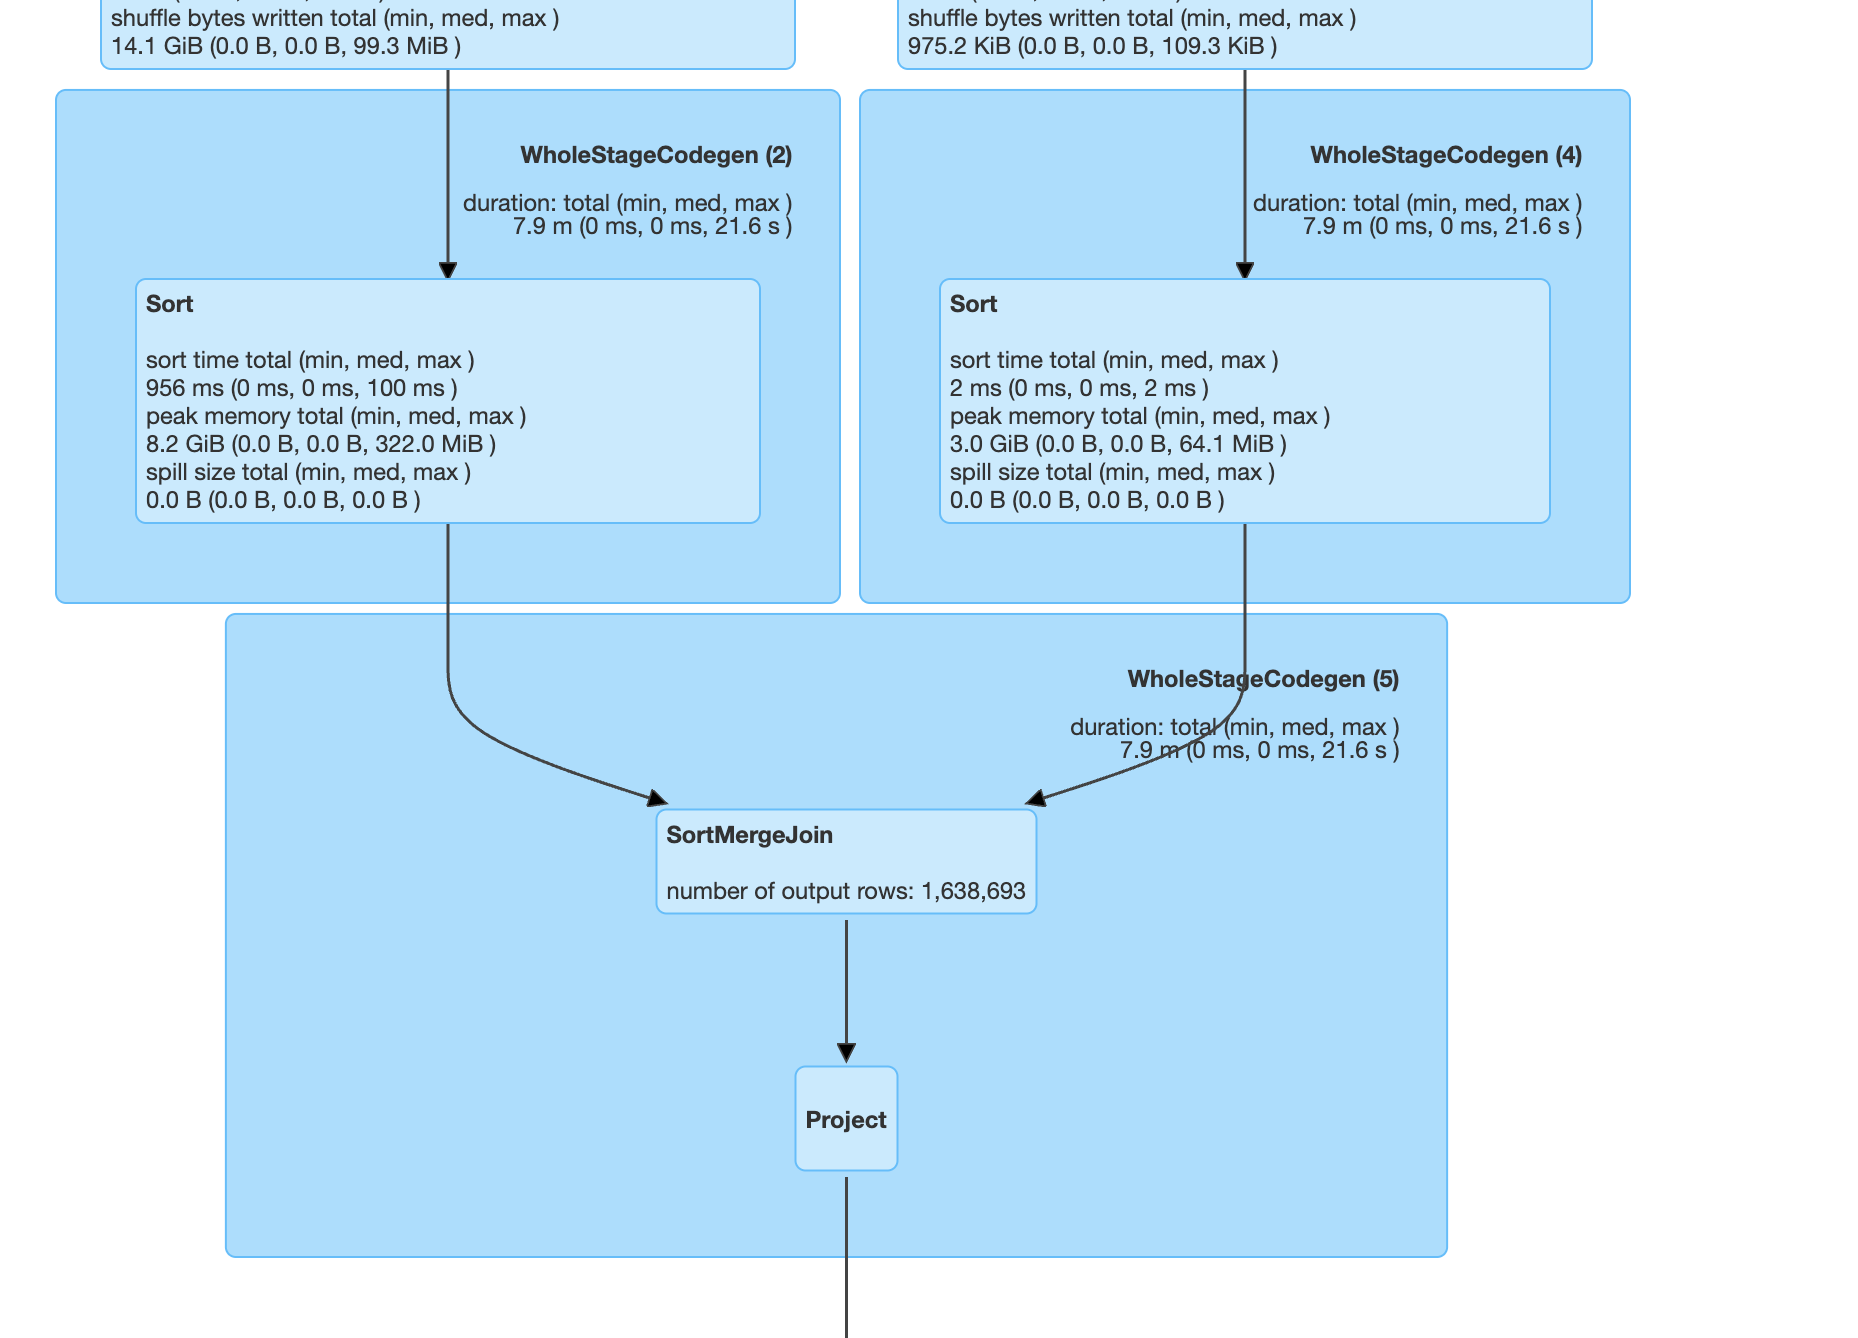

In [310]:
!hdfs dfs -ls -h /user/airbnb/result/data.parquet | head

Found 201 items
-rw-r--r--   1 ubuntu hadoop          0 2024-02-28 22:45 /user/airbnb/result/data.parquet/_SUCCESS
-rw-r--r--   1 ubuntu hadoop      2.4 M 2024-02-28 22:41 /user/airbnb/result/data.parquet/part-00000-886462a2-5146-4d25-b20b-46024e651cf3-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop      4.6 M 2024-02-28 22:41 /user/airbnb/result/data.parquet/part-00001-886462a2-5146-4d25-b20b-46024e651cf3-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop      1.9 M 2024-02-28 22:41 /user/airbnb/result/data.parquet/part-00002-886462a2-5146-4d25-b20b-46024e651cf3-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop      3.7 M 2024-02-28 22:41 /user/airbnb/result/data.parquet/part-00003-886462a2-5146-4d25-b20b-46024e651cf3-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop      2.1 M 2024-02-28 22:41 /user/airbnb/result/data.parquet/part-00004-886462a2-5146-4d25-b20b-46024e651cf3-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop      3.5 M 2024-02-28 22:41 /user/airbnb/result/data.parquet/part-

Теперь посмотрим на изменение плана + таймингов при попытке сделать `broadcast` по фрейму

In [313]:
dict_bc = F.broadcast(dict_sdf)

In [314]:
result_sdf_2 = data_table_full.join(
    dict_bc,
    'host_name',
    'inner'
)

result_sdf_2.explain()

== Physical Plan ==
*(2) Project [host_name#48977, id#48956, listing_url#48957, scrape_id#48958, last_scraped#48959, name#48960, summary#48961, space#48962, description#48963, experiences_offered#48964, neighborhood_overview#48965, notes#48966, transit#48967, access#48968, interaction#48969, house_rules#48970, thumbnail_url#48971, medium_url#48972, picture_url#48973, xl_picture_url#48974, host_id#48975, host_url#48976, host_since#48978, host_location#48979, ... 66 more fields]
+- *(2) BroadcastHashJoin [host_name#48977], [host_name#49347], Inner, BuildRight
   :- *(2) Project [id#48956, listing_url#48957, scrape_id#48958, last_scraped#48959, name#48960, summary#48961, space#48962, description#48963, experiences_offered#48964, neighborhood_overview#48965, notes#48966, transit#48967, access#48968, interaction#48969, house_rules#48970, thumbnail_url#48971, medium_url#48972, picture_url#48973, xl_picture_url#48974, host_id#48975, host_url#48976, host_name#48977, host_since#48978, host_loca

Самое важное изменение - join изменился с SortMergeJoin на BroadcastHashJoin, по сути мы изменили стратегию нашего джойна тем, что один из датафреймов отправили на все наши рабочие воркеры. Данные процедура будет происходить в действии `BroadcastExchange HashedRelationBroadcastMode(List(input[0, string, true])), [id=#6246]`

Посмотрим, за сколько отебиж та же самая операция

In [315]:
! hdfs dfs -rm -r /user/airbnb/result_2

Deleted /user/airbnb/result_2


In [316]:
%%time

result_sdf_2.write.format('overwrite').parquet("/user/airbnb/result_2/data.parquet")

CPU times: user 10.8 ms, sys: 3.33 ms, total: 14.1 ms
Wall time: 2min 18s


Визуализация нового плана запроса в той же SQL вкладке:

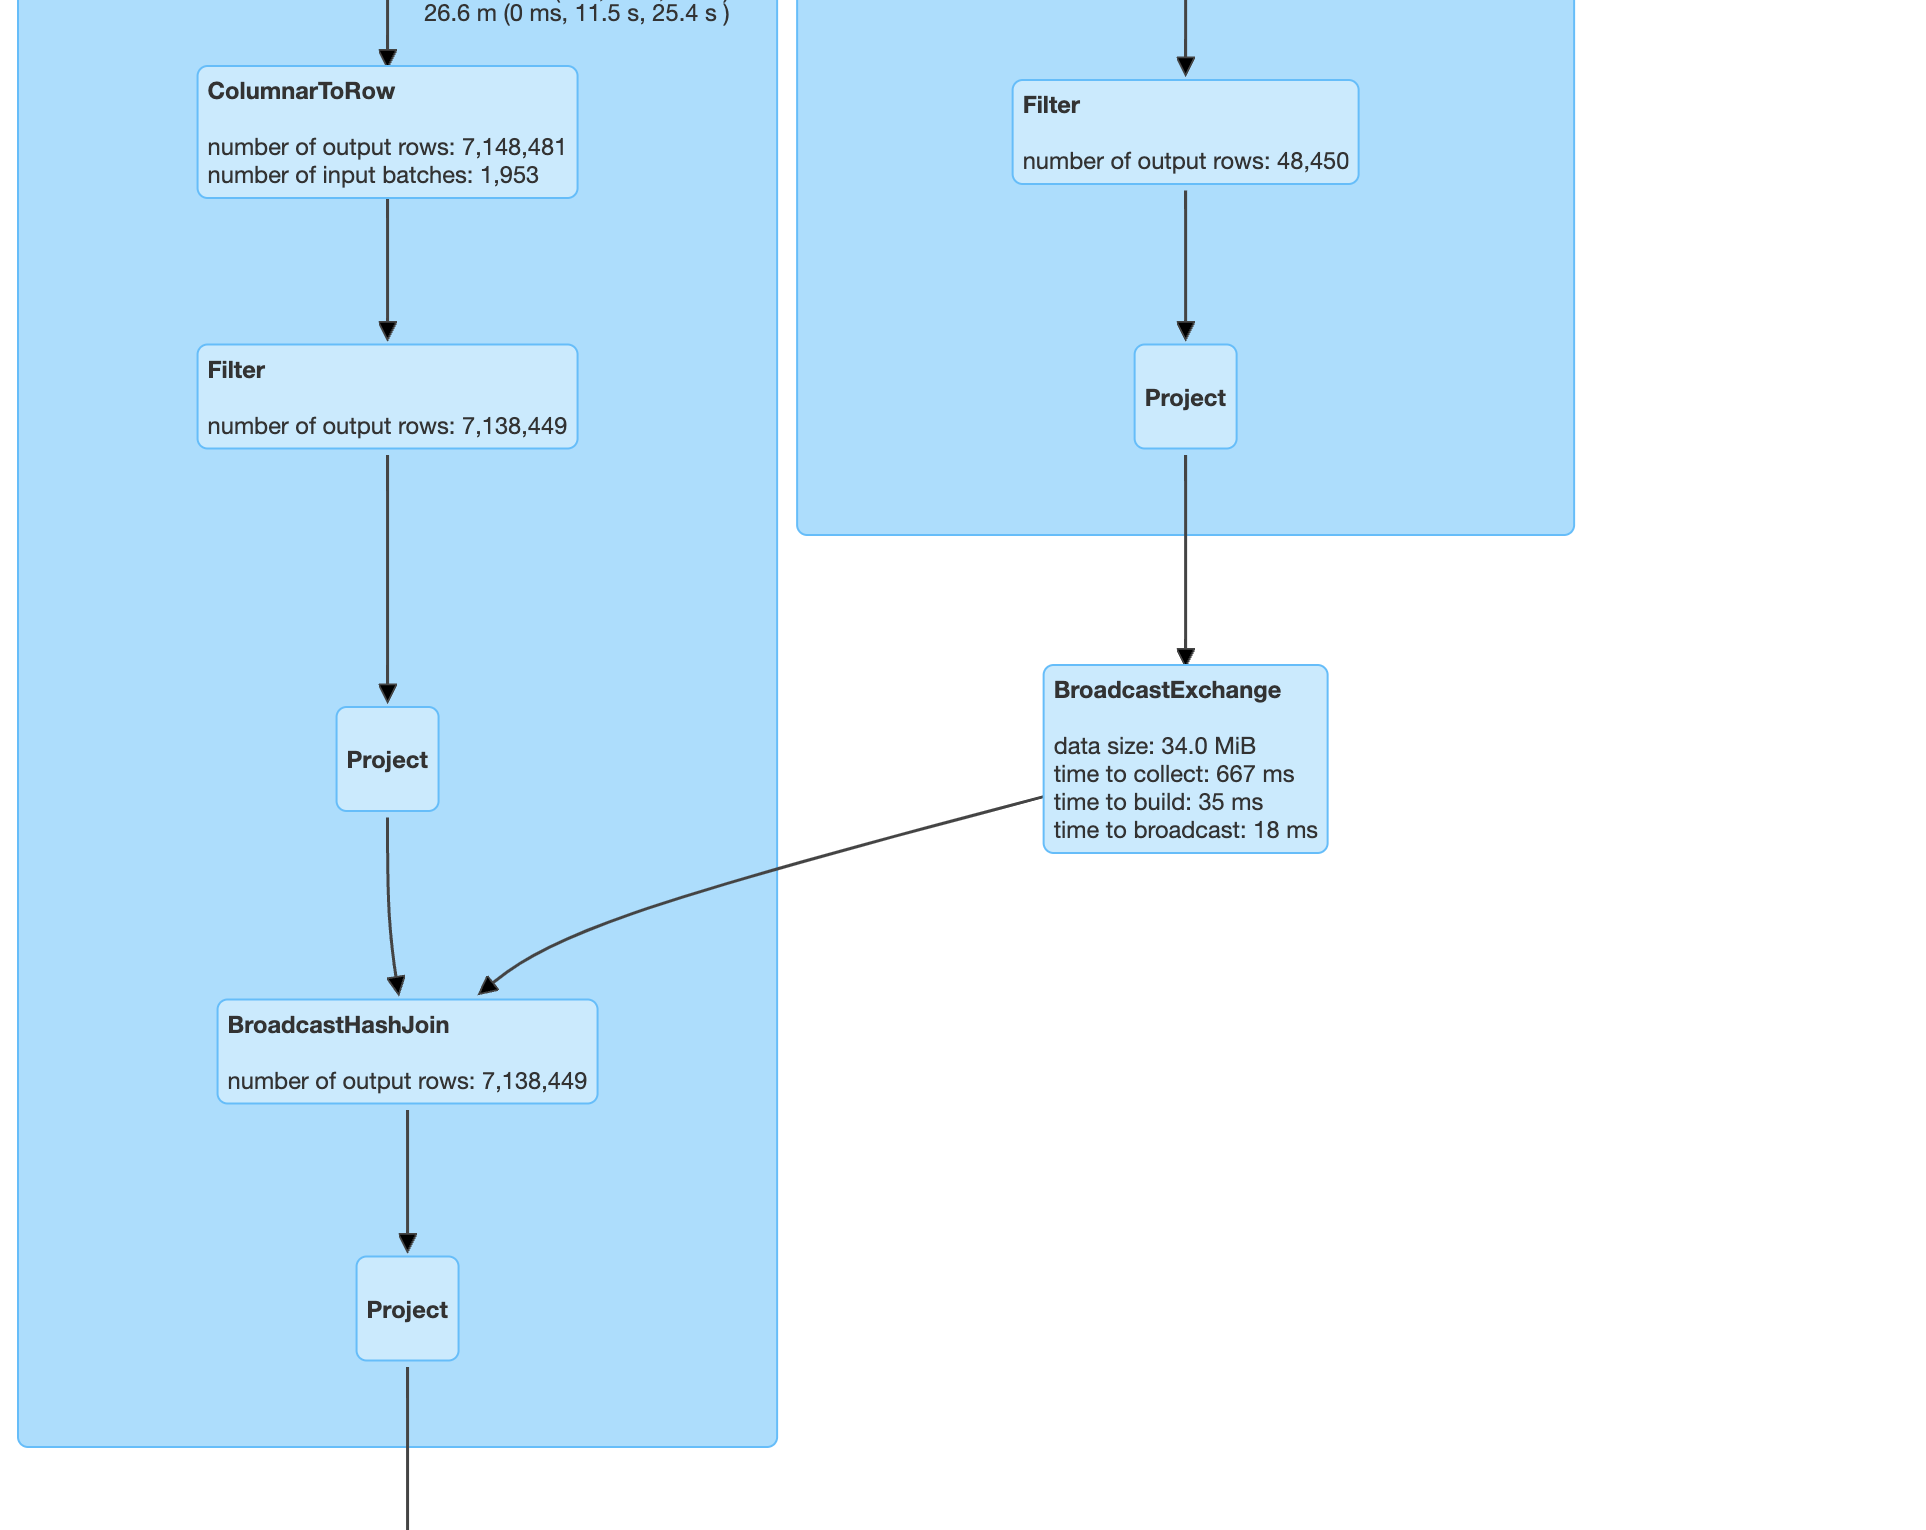

Видим, что даже визуально по связке пайплайн джойна изменился

In [317]:
!hdfs dfs -ls -h /user/airbnb/result_2/data.parquet | head

Found 148 items
-rw-r--r--   1 ubuntu hadoop          0 2024-02-28 22:55 /user/airbnb/result_2/data.parquet/_SUCCESS
-rw-r--r--   1 ubuntu hadoop     80.2 M 2024-02-28 22:53 /user/airbnb/result_2/data.parquet/part-00000-4f1438e2-fd63-4179-b941-c84c3973c9c8-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop     80.2 M 2024-02-28 22:52 /user/airbnb/result_2/data.parquet/part-00001-4f1438e2-fd63-4179-b941-c84c3973c9c8-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop     80.2 M 2024-02-28 22:53 /user/airbnb/result_2/data.parquet/part-00002-4f1438e2-fd63-4179-b941-c84c3973c9c8-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop     80.2 M 2024-02-28 22:53 /user/airbnb/result_2/data.parquet/part-00003-4f1438e2-fd63-4179-b941-c84c3973c9c8-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop     80.2 M 2024-02-28 22:53 /user/airbnb/result_2/data.parquet/part-00004-4f1438e2-fd63-4179-b941-c84c3973c9c8-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop     80.2 M 2024-02-28 22:52 /user/airbnb/result_2/data

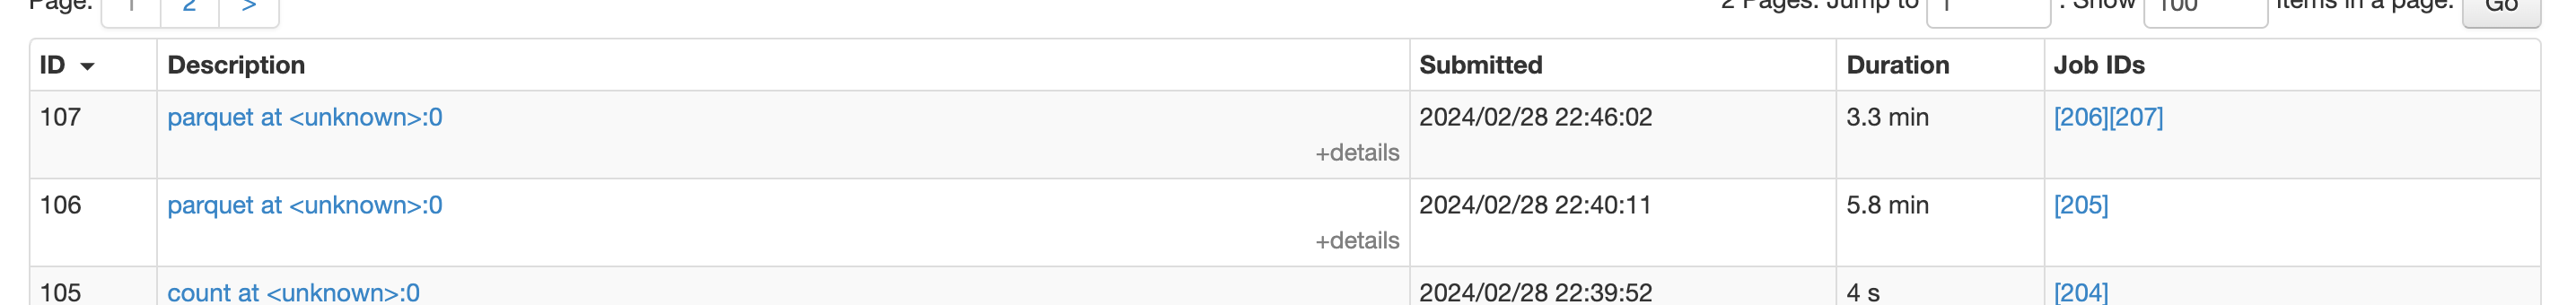

In [328]:
res_1 = se.read.parquet('/user/airbnb/result/data.parquet')
res_1.show(5, False)

res_1.count()

+------------+--------+-------------------------------------+--------------+------------+-------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

7517244

In [329]:
res_2 = se.read.parquet('/user/airbnb/result_2/data.parquet')
res_2.show(5, False)

res_2.count()

+---------+--------+-------------------------------------+--------------+------------+---------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

7517244

Вывод: операция broadcast применима и к спарковским датафреймам данных. Если мы можем один из фреймов раскидать на наши воркеры, то это поможет оптимизировать различные трансофрмации, в которых этот фрейм будет участвовать. В данном примере мы перевели наш джоин из одной стратегии в другую, тем самым получили оптимизацию по времени выаолнения операци. Время оптимизации этой операции будет более ощутимо, когда второй фрейм большего размера будет достигать размеров сотен миллионов строк, а в действительно больших данных такое очень даже может быть.

Более подробно про виды стратегий джойнов есть инфа
[тут](https://habr.com/ru/companies/otus/articles/556722/).

Медиум сейчас забанен, так что приложена ссылка на перевод (такие времена)

Простые хинты в плане помощи оптимизации ващего джойна можно прочитать
[тут](https://kontext.tech/article/1153/spark-join-strategy-hints-for-sql-queries)

Примеры с тем, как понимать текстовые планы, что смотрели выше + на что смотреть во вкладке SQL в UI можно почитать [тут](https://habr.com/ru/companies/avito/articles/764996/). 

Если тут все просто, то перформанс тюниг вашего аппликейшена со всякими более продвинутыми рекомендациями есть [тут](https://spark.apache.org/docs/latest/sql-performance-tuning.html#adaptive-query-execution).
Когда приходится оптимизировать рабочие процессы по трансформации данных, то переодически я заглядываю сюда

### Вы жжете бабло

<img src="https://grizzle.com/wp-content/uploads/2020/01/money-cash-fire-1200x900.png" width="300">

Напоминаю, выключайте ресурсы. Они жрут ваши деньги.